In [2]:
library(tidyverse)
library(colorRamps)
library(wesanderson)
library(plotly)
library(broom)
library(patchwork)
options(repr.plot.width=12, repr.plot.heigh=12)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout




colormap

In [3]:
# colormap <- colorspace::diverge_hcl(12, c=100, l=c(50,90), power=1) 
my_palette <- wes_palette("Zissou1", 12, type = "continuous")

# Set default color and fill scales globally
update_geom_defaults("bar", list(fill = my_palette[1], color= "white"))
update_geom_defaults("col", list(fill = my_palette[2], color="white"))

# Optional: Set default discrete scale globally (use in your plots)
scale_fill_discrete <- function(...) scale_fill_manual(values = my_palette, ...)
scale_color_discrete <- function(...) scale_color_manual(values = my_palette, ...)

plot themes

In [4]:
ThemeMain<-theme( title =element_text(size=16, face='bold'),
                 axis.text.y = element_blank(), 
                 axis.text.x = element_text(color='black'),
                 axis.ticks.y = element_blank(),
                 axis.title.x = element_text(size=16,color='black',face='bold')
                 )


theme_set(theme_bw())
theme_set(ThemeMain)

## Data 

In [5]:
df <- read.csv('../../data/owid-energy-data.csv') %>% drop_na()


In [6]:
head(df)

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,⋯,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Bulgaria,2009,BGR,7634737,107365072896,200.106,0.041,8.078,0.062,1.310,⋯,0.000,0.005,94.656,0.320,0.662,31.435,0.24,86.696,0.567,0.327
2,Bulgaria,2010,BGR,7592271,109045211136,199.971,0.123,24.367,0.185,5.269,⋯,0.022,0.020,187.487,1.229,1.891,89.565,0.68,249.095,1.481,0.894
3,Bulgaria,2011,BGR,7543128,109435363328,5.558,0.010,25.889,0.195,7.954,⋯,0.200,0.124,26.377,0.484,2.375,114.011,0.86,314.918,1.721,1.058
4,Bulgaria,2012,BGR,7488347,110261510144,399.988,0.781,130.387,0.976,9.348,⋯,1.679,1.000,41.784,0.972,3.348,162.920,1.22,447.044,2.626,1.569
5,Bulgaria,2013,BGR,7431169,109643522048,29.912,0.292,170.692,1.268,14.803,⋯,3.231,1.915,12.500,0.396,3.743,184.359,1.37,503.742,3.185,1.890
6,Bulgaria,2014,BGR,7372142,110703534080,-0.613,-0.008,171.004,1.261,27.129,⋯,2.685,1.609,-3.126,-0.139,3.605,180.409,1.33,488.957,2.835,1.704


In [7]:
sorted_cols <- sort(names(df))

for (col in sorted_cols) {
  print(col)
}

[1] "biofuel_cons_change_pct"
[1] "biofuel_cons_change_twh"
[1] "biofuel_cons_per_capita"
[1] "biofuel_consumption"
[1] "biofuel_elec_per_capita"
[1] "biofuel_electricity"
[1] "biofuel_share_elec"
[1] "biofuel_share_energy"
[1] "carbon_intensity_elec"
[1] "coal_cons_change_pct"
[1] "coal_cons_change_twh"
[1] "coal_cons_per_capita"
[1] "coal_consumption"
[1] "coal_elec_per_capita"
[1] "coal_electricity"
[1] "coal_prod_change_pct"
[1] "coal_prod_change_twh"
[1] "coal_prod_per_capita"
[1] "coal_production"
[1] "coal_share_elec"
[1] "coal_share_energy"
[1] "country"
[1] "electricity_demand"
[1] "electricity_generation"
[1] "electricity_share_energy"
[1] "energy_cons_change_pct"
[1] "energy_cons_change_twh"
[1] "energy_per_capita"
[1] "energy_per_gdp"
[1] "fossil_cons_change_pct"
[1] "fossil_cons_change_twh"
[1] "fossil_elec_per_capita"
[1] "fossil_electricity"
[1] "fossil_energy_per_capita"
[1] "fossil_fuel_consumption"
[1] "fossil_share_elec"
[1] "fossil_share_energy"
[1] "gas_cons_change

The data consisits of different information for the following natural resources

- biofuel,
- coal
- fossil fuels,
- gas
- hydro
- low carbon,
- nuclear
- oil
- renewables
- other renewables
- solar
- wind

Each of these resources has the following information

- con_change_pct
- con_chang_twh 
- consumption 
- electricity per capita
- energy per capita 
- share elec
- share energy


Additionaly, The dataset contains information about the country 


- year 
- GDP 
- population
- electricity demand 
- electricity gneeration

In [8]:
RESOURCES = c("biofuel", "coal", "fossil", "gas", "hydro", "low_carbon", "nuclear", "oil", "other", "solar", "wind ")

Unique years for data collected

In [9]:
unique(df$year)

[1] 2009 2010 2011 2012 2013 2014 2015 2016 2005 2006 2007 2008 1993 1994 1995
[16] 1996 1997 1998 1999 2000 2001 2002 2003 2004 2017 2018 2019 2020 2021 2022

Unique countries

In [10]:
unique(df$country)

[1] "Bulgaria"       "Czechia"        "France"         "Germany"       
 [5] "Hungary"        "Romania"        "Slovakia"       "Slovenia"      
 [9] "Spain"          "Ukraine"        "United Kingdom" "United States"

## Univariate

In [11]:
subset <- subset(df, year==2010)

In [12]:
subset

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,⋯,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,Bulgaria,2010,BGR,7592271,1.090452e+11,199.971,0.123,24.367,0.185,5.269,⋯,0.022,0.020,187.487,1.229,1.891,89.565,0.68,249.095,1.481,0.894
14,Czechia,2010,CZE,10464750,2.712320e+11,19.590,0.445,259.469,2.715,206.407,⋯,0.728,0.333,16.464,0.127,0.931,32.490,0.34,88.983,0.399,0.181
50,Germany,2010,DEU,81325088,3.301123e+12,0.094,0.030,387.854,31.542,417.091,⋯,1.916,0.863,-2.215,-3.098,106.990,474.023,38.55,1315.587,6.176,2.781
58,Hungary,2010,HUN,9986832,2.004966e+11,3.470,0.068,202.188,2.019,230.303,⋯,0.000,0.001,59.215,0.538,1.463,53.070,0.53,146.466,1.419,0.526
65,Romania,2010,ROU,20335212,3.354896e+11,180.791,0.853,65.136,1.325,5.409,⋯,0.000,0.001,3300.000,0.824,0.849,15.244,0.31,41.766,0.513,0.214
89,Spain,2010,ESP,46572776,1.480376e+12,37.230,6.038,477.900,22.257,86.102,⋯,2.414,1.159,15.294,15.434,121.241,950.555,44.27,2603.260,14.866,7.164
106,United Kingdom,2010,GBR,62760048,2.190920e+12,16.267,1.863,212.173,13.316,195.347,⋯,0.010,0.005,10.825,2.630,28.549,163.958,10.29,454.885,2.693,1.151
126,United States,2010,USA,311182848,1.523959e+13,14.967,38.636,953.695,296.773,180.248,⋯,0.029,0.032,28.106,56.941,265.368,304.162,94.65,852.773,2.301,1.022


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


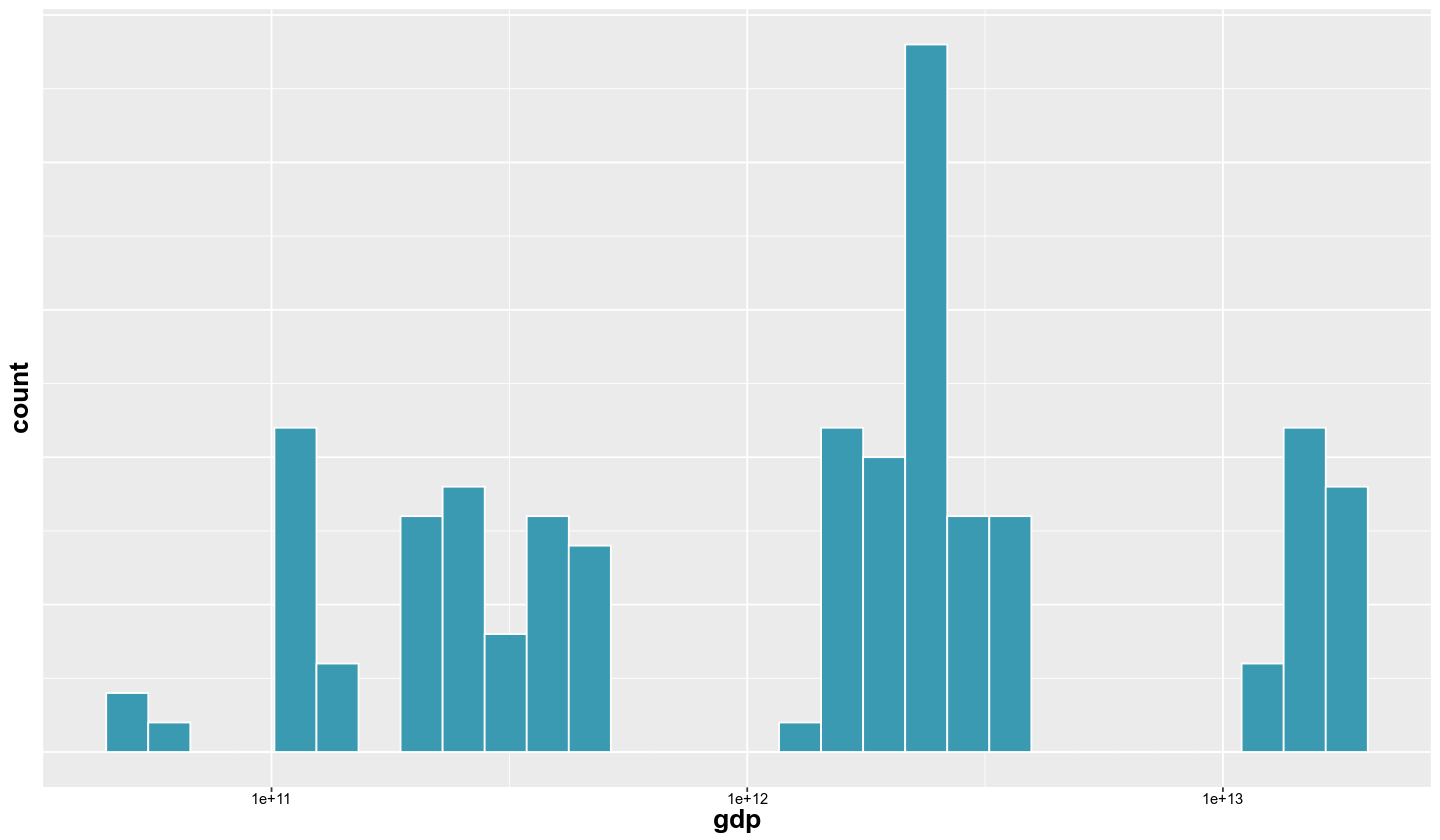

In [13]:
ggplot(data=df, aes(x = gdp) ) +
    geom_histogram(color = "white") +
    scale_x_log10()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


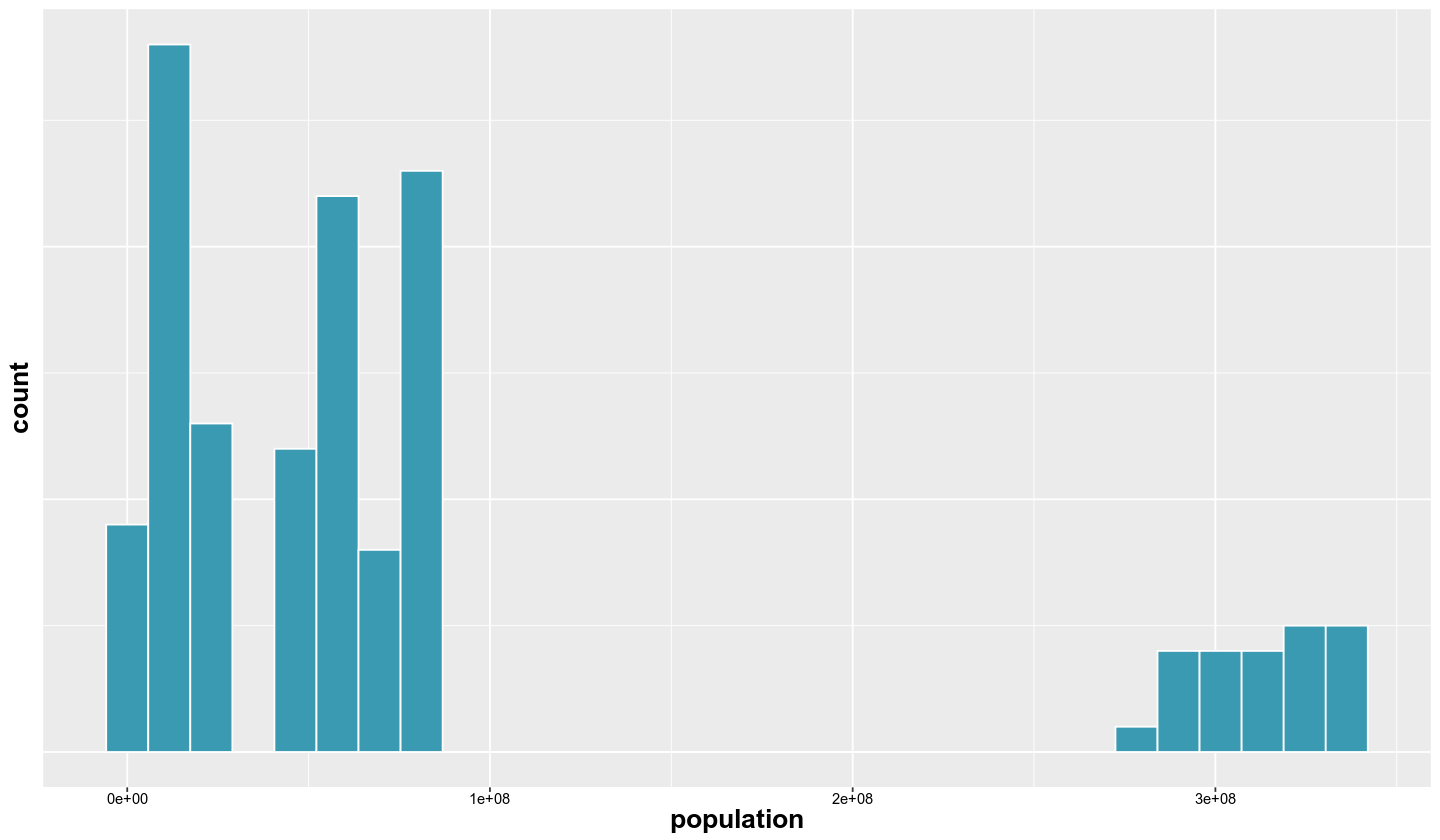

In [14]:

ggplot(df, aes(x = population)) +
 geom_histogram()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


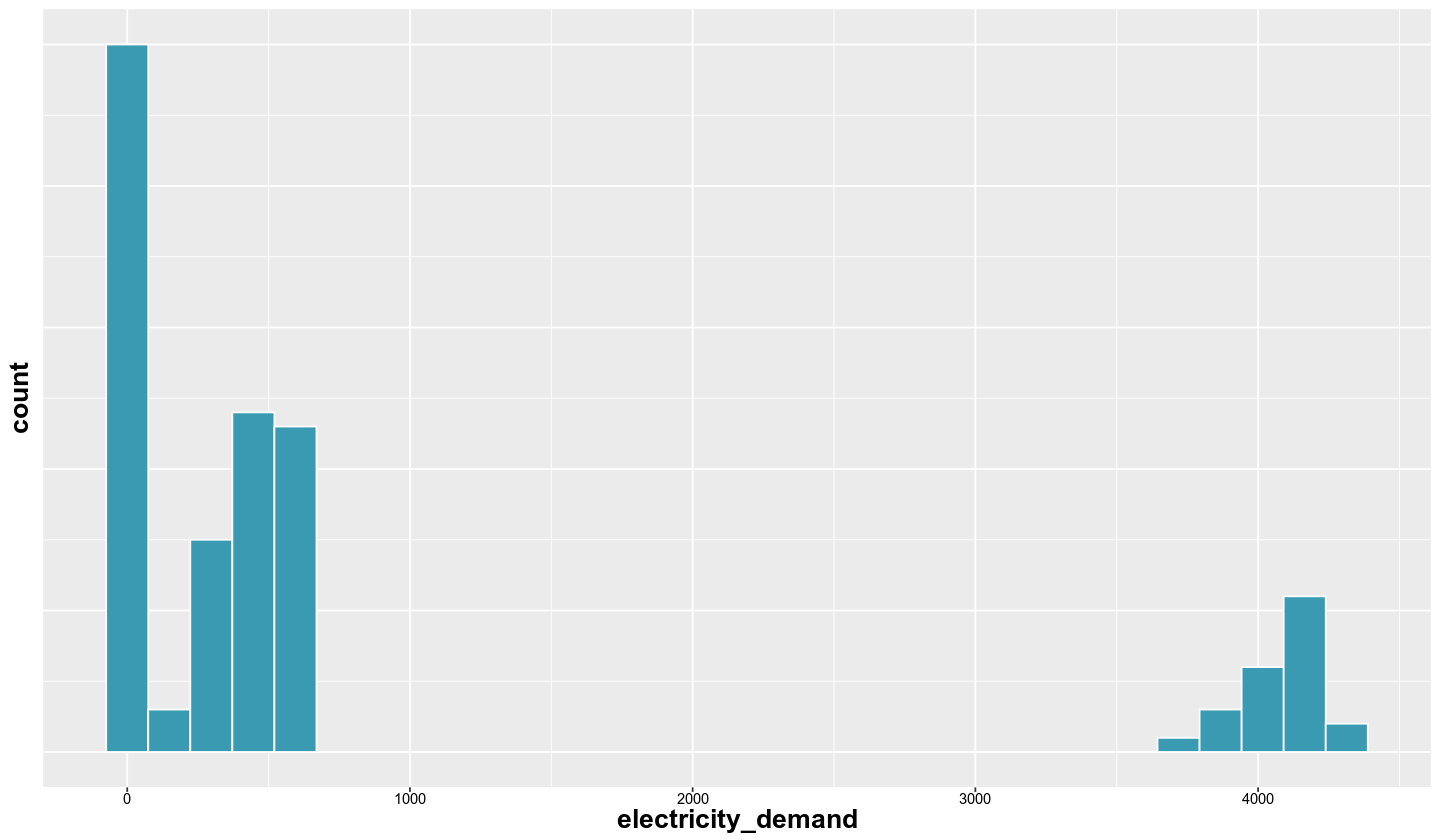

In [15]:
ggplot(df, aes(x = electricity_demand)) + 
    geom_histogram()

### Distirbution of changes in renewable energy and fossil fuels

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


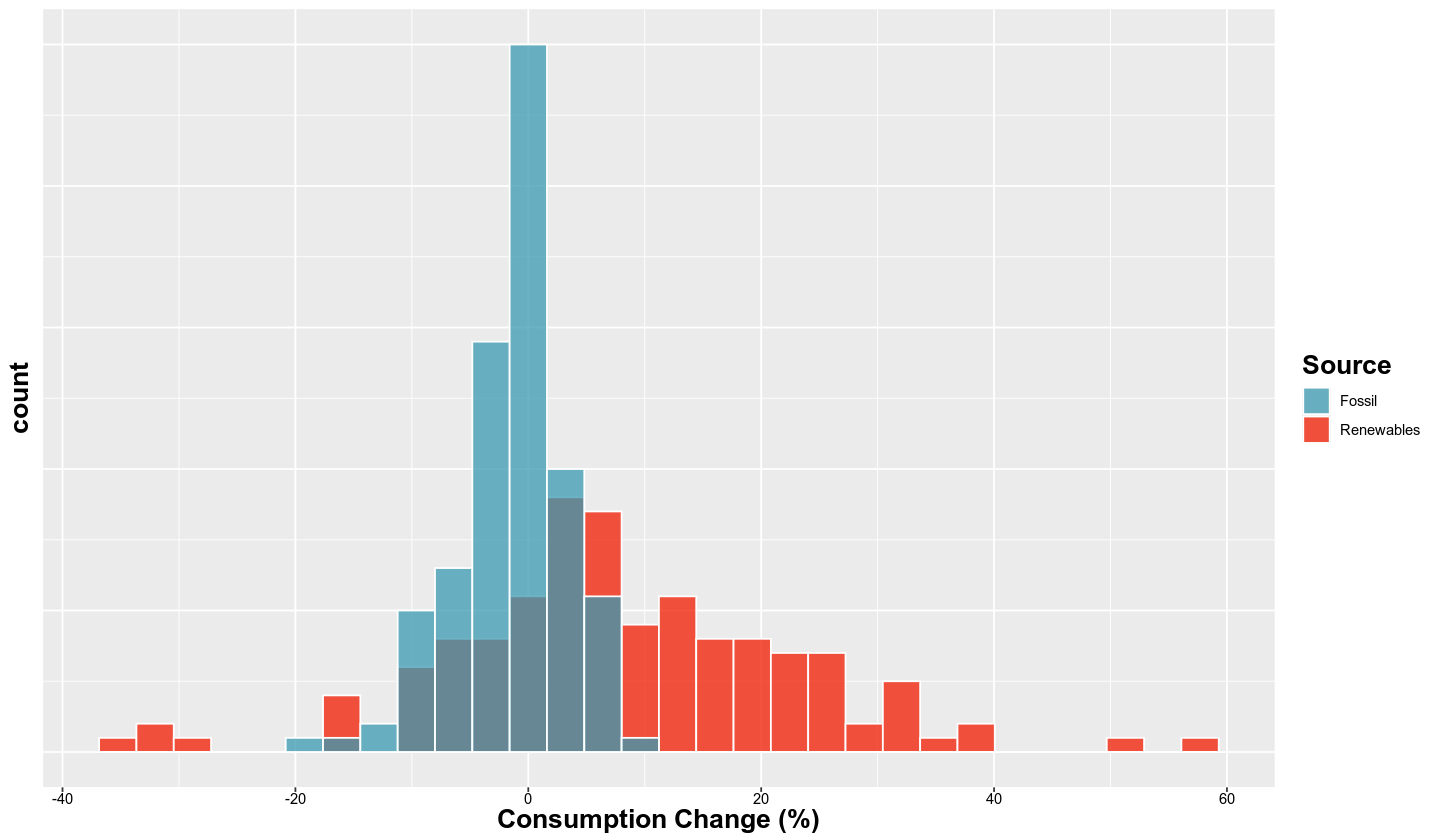

In [16]:

pal <- wes_palette("Zissou1", 2, type = "continuous")

ggplot(df) +
  geom_histogram(aes(x = renewables_cons_change_pct, fill = "Renewables"), 
                 alpha = 0.75, position = "identity") +
  geom_histogram(aes(x = fossil_cons_change_pct, fill = "Fossil"), 
                 alpha = 0.75, position = "identity") +
  scale_fill_manual(values = pal) +
  labs(x = "Consumption Change (%)", fill = "Source") 

In [17]:
df_long <- df %>%
  pivot_longer(
    cols = ends_with("_consumption"),
    names_to = "resource",
    values_to = "consumption"
  ) %>%
  mutate(resource = gsub("_consumption", "", resource))




Warning message in scale_x_log10():
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 3 rows containing non-finite outside the scale range (`stat_bin()`).”


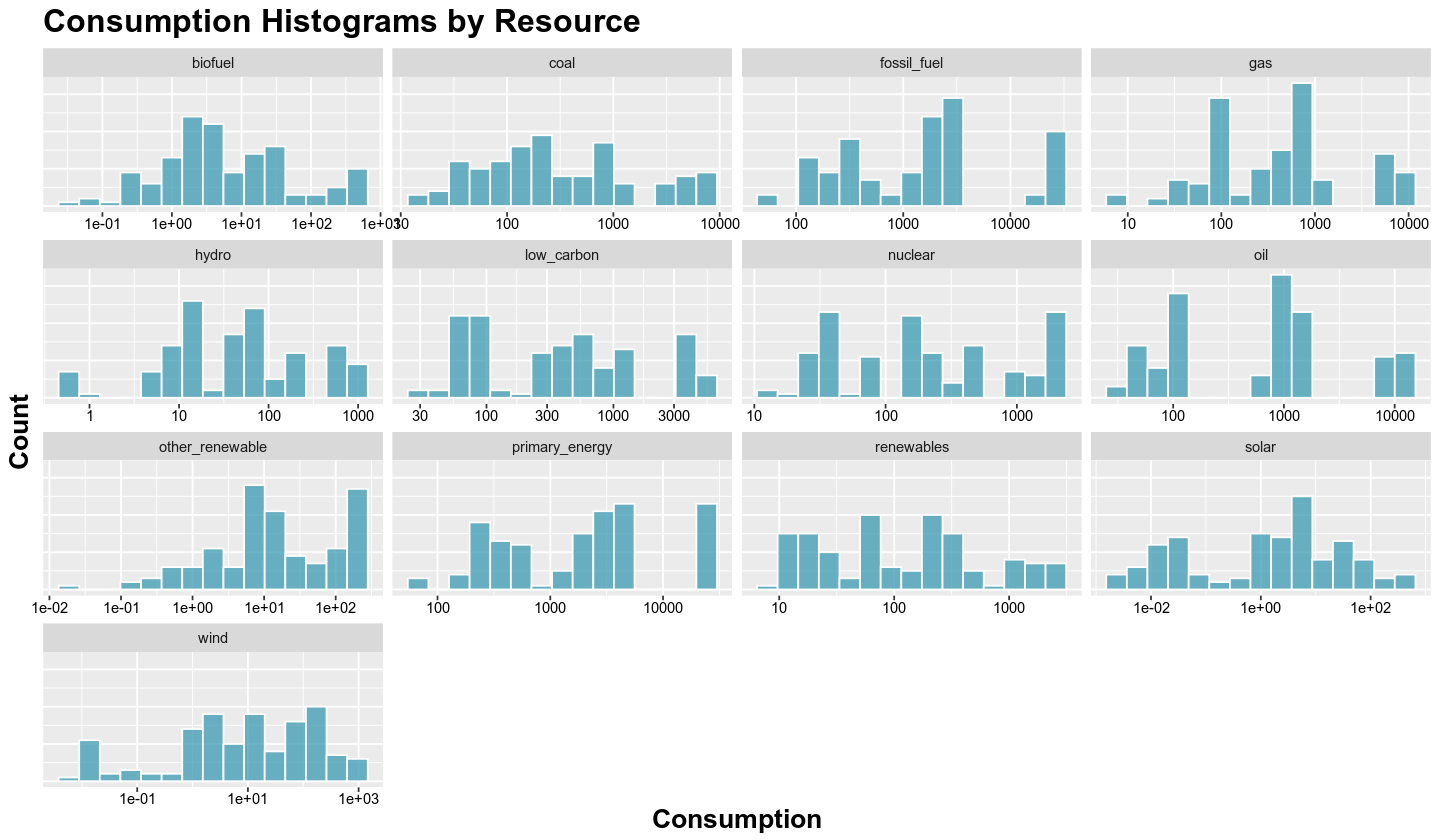

In [22]:
ggplot(df_long, aes(x = consumption)) +
  geom_histogram(fill = my_palette[1], color = "white", alpha = 0.75, bins=15) +
  facet_wrap(~ resource, scales = "free_x") + 
  scale_x_log10() +
  labs(x = "Consumption", y = "Count", title = "Consumption Histograms by Resource")
  

In [ ]:
df_long <- subset %>%
  pivot_longer(
    cols = ends_with("_consumption"),
    names_to = "resource",
    values_to = "consumption"
  ) %>%
  mutate(
    resource = gsub("_consumption", "", resource),
  ) %>%
  filter(resource %in% RESOURCES) %>%
  group_by(resource) %>% 
  summarize(total = sum(consumption)) 

In [ ]:
head(df_long)

resource,total
<chr>,<dbl>
biofuel,370.132
coal,7543.367
gas,9069.735
hydro,976.300
low_carbon,5496.798
nuclear,3154.493


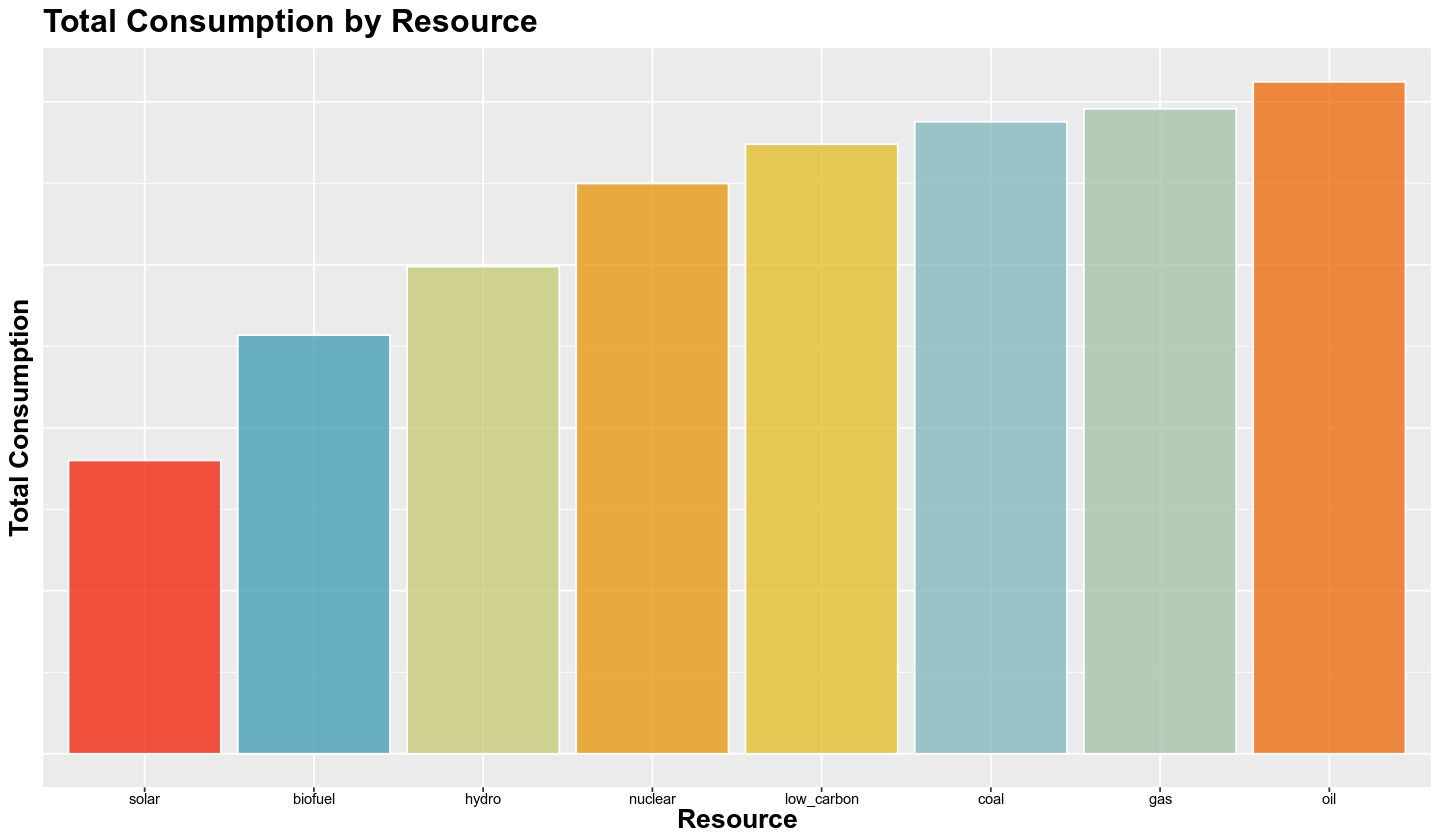

In [ ]:
pal <- wes_palette("Zissou1", 8, type = "continuous")


ggplot(df_long, aes(x = fct_reorder(resource, total), y = total, fill=resource)) +
  geom_col(alpha = 0.75, show.legend = FALSE) +
  scale_fill_manual(values = pal) +
  scale_y_log10() + 
  labs(x = "Resource", y = "Total Consumption", title = "Total Consumption by Resource")

## Bivariate

## Hyper Variate